# 2.4 微积分

2000多年前，古希腊人用逼近法（method of exhaustion）计算圆的面积。事实上，逼近法就是积分（integral calculus）的起源。2000多年后，微积分的另一个分支：微分（differential calculus）被发明出来。在微分学中，最重要的应用是优化问题，即考虑如何把事情做到最好，优化问题在深度学习中无处不在。

在深度学习中，我们“训练”模型，使它们在见到越来越多的数据时变得更好。通常情况下，“变得更好”意味着最小化一个损失函数（loss fuction），即一个衡量“模型的表现有多差”这个问题的分数。最终，我们关心的是模型是否能在各种各样的，包括它过去没见过的数据上表现良好，但“训练”模型只能将模型与我们实际见到的数据相拟合。因此，我们可以将拟合模型的任务分解为两个关键问题。

* 优化（optimization）：用模型拟合观察数据的过程。
* 泛化（generalization）：数学原理和实践者的智慧，能够指导我们生成有效性超出用于训练的数据集本身的模型。

## 2.4.1 导数和微分

在深度学习中，我们通常选择对于模型参数可微的损失函数。也就是说，对于每个参数，我们可以知道损失随其变化而变化的速度。

假设有一函数$ f $，其输入输出均为标量，如果$ f $的导数存在，那么：
$$ f'(x) = lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$$
这个$ f'(x) $就称为$ f(x) $的导数，是$f(x)$相对于$ x $的瞬时（instantaneous）变化率。

In [8]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

现在定义$ u = f(x) = 3x^2 - 4x $：

In [9]:
def f(x):
    return 3 * x ** 2 - 4 * x

通过令$ x = 1 $并让$ h $趋于0，计算$ u $在$ x = 1 $处导数的近似值：

In [35]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

h = 0.1
for i in range(5):
    print(f'h = {h:.5f}, numeraical limit = {numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h = 0.10000, numeraical limit = 2.30000
h = 0.01000, numeraical limit = 2.03000
h = 0.00100, numeraical limit = 2.00300
h = 0.00010, numeraical limit = 2.00030
h = 0.00001, numeraical limit = 2.00003


在误差允许的范围内，我们可以用上面的定义和程序计算导数数值的近似解，也可以用定义得到导数的解析解。但更一般的，我们会将常见函数的求导公式和求导法则结合来求导，这部分的内容可参见数学教材，这里不再展开。

为了对导数进行可视化，我们使用matplotlib绘图库，下面定义几个函数：

In [11]:
# #@save is a mark saving the relative function, class or statement in d2l package
def use_svg_display(): #@save
    '''use svg format plot in jupyter'''
    backend_inline.set_matplotlib_formats('svg')

In [12]:
def set_figsize(figsize=(3.5, 2.5)): #@save
    '''set the size of figure'''
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [13]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend): #@save
    '''set axes of matplotlib'''
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()

通过这3个用于图形配置的函数，定义一个plot函数来简洁地绘制多条曲线，方便后面使用。

In [33]:
def plot(X, Y=None, xlabel=None, ylabel=None, xlim=None, ylim=None, legend=[], xscale='linear', yscale='linear', 
         fmts=('-', 'm--', 'g-', 'r:'), figsize=(3.5, 2.5), axes=None):
    '''plot the data point'''
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    def has_one_axis(X):
        return (hasattr(X, 'ndim') and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], '__len__'))
    
    if has_one_axis(X):
        X = [X]
        
    if not Y:
        X, Y = [[] * len(X)], X
    elif has_one_axis(Y):
        Y = [Y]
        
    if len(X) != len(Y):
        X = X * len(Y)
        
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(X):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
            
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

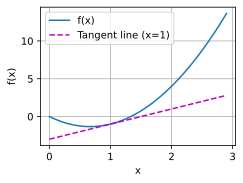

In [34]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 2.4.2 偏导数

在深度学习中，函数通常依赖许多变量。因此，我们需要将微分的思想推广到多元函数（multivariate function）上。

设$ y = f(x_1, x_2, ..., x_n) $是一个具有$ n $个变量的函数。$ y $关于第$ i $个参数$ x_i $的偏导数（partial derivative）为

$$ \frac{\partial y}{\partial x_i} = lim_{h \to 0} \frac{f(x_1, ..., x_{i - 1}, x_i + h, x_{i + 1}, ..., x_n) - f(x_1, ..., x_{i - 1}, x_i, x_{i + 1}, ..., x_n)}{h} $$

在计算$ \frac{\partial y}{\partial x_i}$时，可以简单地将$ x_1, ..., x_{i - 1}, x_{i + 1}, ..., x_n $看作常数。

## 2.4.3 梯度

通过连接一个多元函数对其所有变量的偏导数，可以得到该函数的梯度（gradient）向量。具体而言，设函数$ f $的输入是一个$ n $维的向量$ x = [x_1, x_2, ..., x_n]^T $，输出是一个标量，那么$ f(x) $ 相对于$ x $的梯度是一个包含$ n $个偏导数的向量：

$$ \nabla_x f(x) = [\frac{\partial f(x)}{\partial x_1}, \frac{\partial f(x)}{\partial x_2}, ..., \frac{\partial f(x)}{\partial x_n}]^T $$

其中，在没有歧义时，$ \nabla_x f(x) $可以用$ \nabla f(x) $替代。 

假设$ x $为$ n $维向量，在对多元函数求微分时，经常使用以下规则：

* 对于所有$ A \in \mathbb{R}^{m \times n} $，都有$ \nabla_x A x = A^T $
* 对于所有$ A \in \mathbb{R}^{n \times m} $，都有$ \nabla_x x^T A = A $
* 对于所有$ A \in \mathbb{R}^{n \times n} $，都有$ \nabla_x x^T A x = (A + A^T) x $
* $ \nabla_x || x ||^2 = \nabla_x x^T x = 2 x $

同样，对于任何矩阵$ X $，都有$ \nabla_X || X ||^2_F = 2 X \$。我们后面会看到，梯度对于设计深度学习中的优化算法有很大用处。

## 2.4.4 链式法则

然而，用上面的方法可能很难找到梯度。这是因为，在深度学习中，多元函数通常是复合（composite）的，很难直接应用上面的规则。幸运的是，链式法则可以被用来对复合函数求微分。

我们先考虑单变量的函数，假设函数$ y = f(u) $和$ u = g(x) $都是可微的，根据链式法则，有

$$ \frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}$$

再考虑一个更一般的场景：假设函数$ y $有变量 $ u_1, u_2, ..., u_m $，其中每个函数$ u_i $都有变量$ x_1, x_2, ..., x_n $，则对于任意的$ x_i $，链式法则给出：

$$ \frac{dy}{dx_i} = \frac{dy}{du_1}\frac{du_1}{dx_i} + \frac{dy}{du_2}\frac{du_2}{dx_i} + \cdots + \frac{dy}{du_m}\frac{du_m}{dx_i}$$